<h1><center><font color=darkblue> HEART DISEASE PREDICTION USING LOGISTIC REGRESSION<font></center></h1>

## <font color=RoyalBlue>Introduction</font>

We are going to analyze the different potential factor that could lead into a coronary health disease over the next 10 years. We will analyze different category of health parameters like
* Demographic details like age.
* Lifestyle like smoking.
* Medical health like hypertension, diabetes, cholestrol etc.
    
This is a classification problem where we will predict if a person is having a potential risk of a heart disease. So, The answer will be 'Yes' and 'No'. We will use the Logistic Regression algorithm to predict. Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Linear Regression is generally used to predict the continuous values like we did in Zestimate calculation in one of our exercise but Logistic is used for binary prediction.The below diagram shows the difference between the Linear and Logistic Regression.
    
[//]: #![](LogisticReg.jpg)

<img src="LogisticReg.jpg" width=800 height=400 />

## <font color=RoyalBlue>Dataset Description<font>

The dataset is publically available on the Kaggle website. It is an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.  The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. The dataset is categorized in different categories like demographic, behavioural and medical risk factors in the dataset.

 - **<font color=SteelBlue>Demographic:<font>**
sex: male or female;(Nominal)

    -  age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


 - **<font color=SteelBlue>Behavioural<font>**

    -  currentSmoker: whether or not the patient is a current smoker (Nominal)

    -  cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

 - **<font color=SteelBlue>Medical( history):<font>**

    -  BPMeds: whether or not the patient was on blood pressure medication (Nominal)

    -  prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

    -  prevalentHyp: whether or not the patient was hypertensive (Nominal)

    -  diabetes: whether or not the patient had diabetes (Nominal)

 - **<font color=SteelBlue>Medical(current):<font>** 

    -  totChol: total cholesterol level (Continuous)

    -  sysBP: systolic blood pressure (Continuous)

    -  diaBP: diastolic blood pressure (Continuous)

    -  BMI: Body Mass Index (Continuous)

    -  heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

    -  glucose: glucose level (Continuous)


 - **<font color=SteelBlue>Predict variable (desired target):<font>**

    -  10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


## <font color=RoyalBlue>Data Analysis<font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("framingham.csv")
shp = df.shape
print('\nThe numbers of rows in the dataset are' + str(df.shape[0]) + ' and the number of columns in the dataset are ' + str(df.shape[1]) + '\n')
print(df.columns)
print('\n')
df.head()


The numbers of rows in the dataset are4238 and the number of columns in the dataset are 16

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')




,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Education shouldn't have much impact on the Heart Disease. It can help deciding what to eat and what not to be healthy but there are other prominent factors in the dataset to choose from. 
# So, I am dropping Education for now.

df = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Dropping the missing values
print(df.isnull().sum())
df.dropna(axis=0,inplace=True)
print(df.shape)
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
(3749, 15)


male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [5]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## <font color=RoyalBlue>Feature Engineering<font>

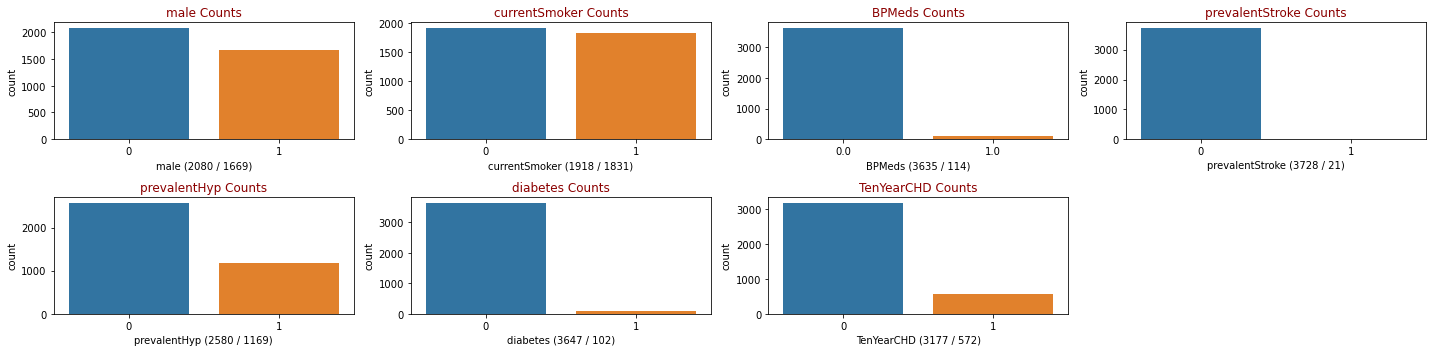

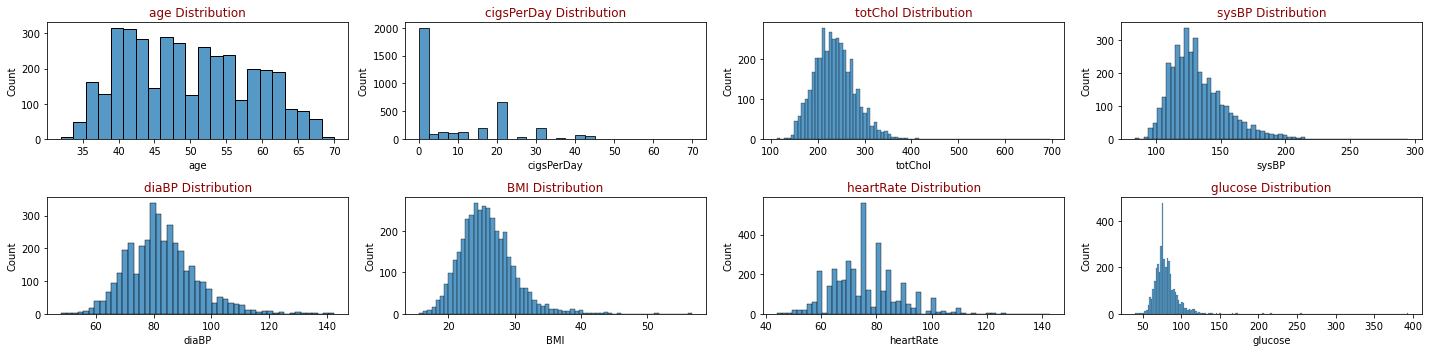

In [6]:
def discrete_cnt(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,5))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        x_title = feature + ' (' + str(dataframe[feature].where(dataframe[feature]== 0).count()) + ' / ' + str(dataframe[feature].where(dataframe[feature]== 1).count()) + ')'
        sns.countplot(x = feature,data=df).set_xlabel(x_title)
        ax.set_title(feature+" Counts",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

def continuous_hist(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,5))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        #dataframe[feature].hist()
        sns.histplot(x=feature,data=df)
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()


df_discrete = df[['male','currentSmoker',  'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']]
                 
df_continuous = df[['age', 'cigsPerDay',
       'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

discrete_cnt(df_discrete,df_discrete.columns,2,4)
continuous_hist(df_continuous,df_continuous.columns,2,4)

The above plots shows the counts and distribution for all the attributes in the dataset :-
* There are 2080 males and 1669 females in the dataset.
* There are 1831 chain smokers out of 3749 sample set.
* A lot of people are on BP medication and mostly people don't have any prevalant stroke in the past.
* 1169 people have Hypertension issues and only 102 have diabetes.
* The dataset has a fairly sparsed age group starting from 35 to 70.
* Most of the people doesn't smoke at all but 500+ people have approx. 20 cigrette a day which is a huge number.
* The rest of the distribution graph is pretty good with BP level peaking between 80-120, BMI at 25, heart rate at 70, glucose at 70 except cholestrol is moving towards 200+.

There are still people on the higher side which might b impacting their heart condition.There are 3179 patents with no heart disease and 572 patients with risk of heart disease. So, We will further evaluate the impact of the above factors on the heart disease. We will plot different scatter plot graph to see what might be used for Logistic model.

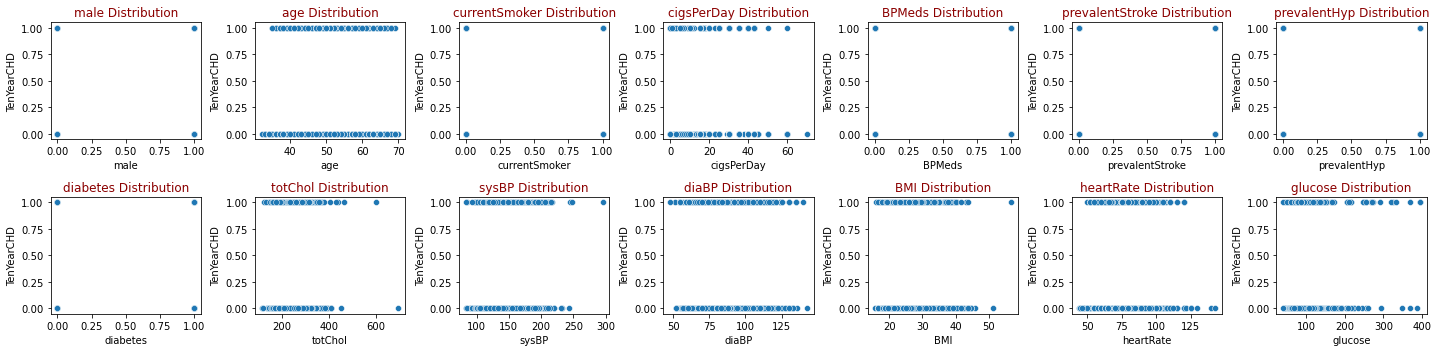

In [7]:
def scattersubplot(dataframe, features, rows, cols,b):
    fig=plt.figure(figsize=(20,b))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        #dataframe[feature].hist()
        sns.scatterplot(x=feature,y= 'TenYearCHD',data=df)
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

df_scatter = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

scattersubplot(df_scatter,df_scatter.columns,2,7,5)

The above scatterplots shows that age, cigsperday, Cholestrol, BP, BMI, Heart Rate and glucose looks like a good fit for the Logistic model as the others have a binary value on the X axis as well. So, The other attributes might not be a good fit. So, We should choose the below features for our Logistic Regression model based on the above analysis :-
1) age
2) cigsPerDay
3) totChol
4) sysBP
5) diaBP
6) BMI
7) heartRate
8) glucose

## <font color=RoyalBlue>Logistic Regression<font>

In [8]:
x= df[['age','cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']]
y= df.TenYearCHD

I have to remove the DiaBP because I was getting the below converge warning :

 ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
 
It mightbe because if you see the above scatterplot, For all values of DiaBP we have people with heart issue and without heart issues. So, The model might not be able to fit properly. So, I removed it.

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=5)

In [10]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

## <font color=RoyalBlue>Model Evaluation<font>

### <font color=CornflowerBlue>Model accuracy<font>

In [11]:
# performing predictions on the test datdaset
import sklearn
yhat = logreg.predict(x_test)
y_pred = list(map(round, yhat))
print('Accuracy : ' + str(sklearn.metrics.accuracy_score(y_test,y_pred)))
print('Precision : ' + str(sklearn.metrics.precision_score(y_test, y_pred)))

Accuracy : 0.8666666666666667
Precision : 0.6363636363636364


####  <font color=DarkBlue>Accuracy of the model is approx. 87%
####  <font color=DarkBlue>Precision of the model is approx. 64%

It is not the best accuracy and precision but I tried with multiple hit and trials but couldn't get much better accuracy. 

### <font color=CornflowerBlue>Confusion matrix<font>

<AxesSubplot:>

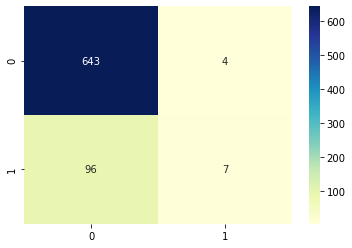

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 643+7 = 660 correct predictions which is almost 87% and 96+4= 100 incorrect ones.

<font color=DarkBlue>**True Positives** (Actually prone to CHD and model is also predicted prone) :  __7__<font>

<font color=DarkBlue>**True Negatives** (Actually not prone to CHD but model is predicted prone) : __643__<font>

<font color=DarkBlue>**False Positives** (Actually prone to CHD but model is predicted not prone) : __96__ <font>

<font color=DarkBlue>**False Negatives** (Actually not prone to CHD and the model has predicted prone) : __4__ <font>
    
But the model has predicted 96 cases in which there is a chance of getting a Heart Disease but the model didn't predict. So, I won't say this is a very good model as these people should have been identified prone to getting heart disease and should have been notified to improve their lifestyle.

In [13]:
# The order of values below in the dataset 'age','cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']
d=[[37,0,310,130,28,70,90],
   [37,0,270,120,25,70,90],
   [70,10,300,135,32,70,120]]
sample = pd.DataFrame(data=d)
logreg.predict(sample)

array([0, 0, 1], dtype=int64)

The above results are the predictions for 3 sample datasets and the outcomes are as below :-
* A 37 year old person with even very high cholestrol (310) and High Blood Pressure - 130 is not having a chance of any heart disease in the next 10 year.
* A 37 year old person with slightly high cholestrol (270) is also not having a chance of any heart disease in the next 10 year.
* But a 70 years old person who smokes 10 cigarette a day with High blood pressure and high cholestrol is having a cance of CHD in next 10 years. 

In [14]:
logreg.predict_proba([[37,0,310,130,28,70,90],
                      [37,0,270,120,25,70,90],
                      [70,10,300,135,32,70,130]])

array([[0.94360878, 0.05639122],
       [0.95585659, 0.04414341],
       [0.48280241, 0.51719759]])

The prediction probability shows :-
* The model is almost 95% sure of for the first 2 persons that they are not prone to CHD.
* But the model is less than 50% sure for the third person even after having no so good health and old age.


##  Conclusions:

The model is good in predicting when a person won't get a CHD but it is not sure when a personis prone to CHD. The above confusion matrix also shows that where 96 people were actually prone to CHD but it predicted not prone.

One of the possible reason might be the data. If we see the below scattered plot snapshot ( plotted above ), None of the feature is clearly defining that what feature can decide CHD surely. There are people with all levels of feature prone and not prone to CHD. So, It is difficult for the model to predict with more precision.

[//]: #![](FeaturesScatterPlot.jpg)

<img src="FeaturesScatterPlot.jpg" width=2000 height=1000 />

__Outcomes :-__
 - Out of all the selected features, Age and cholesterol seems to be bit more significant over the othes to predict CHD. 
 - The model predicted with almost 87% accuracy. The model is more specific than sensitive as the precision is only 64%.
 - Overall model could be improved with more data.
